In [ ]:
import keras
keras.__version__

'2.9.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#%cd drive/MyDrive

MessageError: ignored

# 1. binary (2-class) classification

**Classifying movie reviews: A binary classification example**

In this example, you’ll learn to classify movie reviews as
positive or negative, based on the text content of the reviews. We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. Just like the MNIST dataset, the IMDB dataset comes packaged with Keras.

The following code will load the dataset (when you run it the first time).

In [ ]:
# Loading the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded.

In [ ]:
print(train_data[:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
print(train_labels[:5])

[1 0 0 1 0]


The variables `train_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [ ]:
# Check list of words in first review (index 0)
print(train_data[0])
print(len(train_data[0]))
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
1


Because we’re restricting ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [ ]:
# Check the maximum sequence of words
max([max(sequence) for sequence in train_data])

9999

If you're interested, here's how to decode any of the reviews back to English words:

In [ ]:
# Decoding reviews back to text

#retreive dictionary mapping words to an integer index
word_index = imdb.get_word_index()   

#Reverses content of dictionary, mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) 

#Decodes the review. Note that the indices are offset by 3
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Note that in the last line, the indices (i) are offset by 3 
because 0, 1, and 2 are reserved indices for “padding,”
“start of sequence,” and “unknown.”

In [ ]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preparing the data
You can’t directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous (adjacent) batches of data. You have
to turn your lists into tensors. There are two ways to do that:

1. Pad your lists so that they all have the same length, then turn them into an integer tensor of shape (samples, max_length), and start your model with a layer capable of handling such integer tensors (the Embedding layer).

2. *Multi-hot encode* your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a `Dense layer`, capable of handling floating-point vector data, as the
first layer in your model.

We will use the latter solution to vectorize the data through a manual process for maximum clarity.

In [ ]:
# Encoding the integer sequences via multi-hot encoding in the training and test datasets
import numpy as np

# Create function for vectorising the sequences of integers
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))     #creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.    #sets specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data)     #vectorized training data
x_test = vectorize_sequences(test_data)     #vectorized test data


In [ ]:
print(x_test[0])   #training data (review) at index 0
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [ ]:
x_test.dtype

dtype('float64')

In [ ]:
train_labels.dtype

dtype('int64')

In [ ]:
# Also vectorise your training and test labels and change the data type
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_test[99]

0.0

The data is now ready to be fed into a neural network.

## Building a network

The input data are vectors, and the labels are scalars (1s and 0s). A type of model that performs well on such a problem is a plain stack of densely connected (Dense) layers with relu activations.

You need to decide:
1. How many layers to use
2. How many units to choose for each layer

We will learn formal principles to guide us in making these choices later, but for now, let's proceed with the following architecture choices:

a) Two intermediate layers with 16 units each.
b) A third layer that will output the scalar prediction regarding the sentiment of the current review.

In [ ]:
# Model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])

The first argument being passed to each Dense layer is the number of output units, which represents the dimensionality of the 
representation space of the layer. Thus, we have the following chain of tensor operations:

`output = relu(dot(input, W) + b)`

Having 16 units means the weight matrix `W` will have shape `(input_dimension, 16)`: the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation).

Having more units (a higher-dimensional representation space) allows your model to learn more-complex representations, but it makes the model more computationally expensive and may lead to learning unwanted patterns (patterns that will
improve performance on the training data but not on the test data).

A `relu` (rectified linear unit) is a function meant to zero out negative values, whereas a `sigmoid` “squashes” arbitrary values into the `[0, 1] interval`.

Here, it’s best to use the `binary_crossentropy loss function`when dealing with models that output probabilities. *Crossentropy* is a quantity from the field of information theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.
As for the choice of the optimizer, we’ll go with rmsprop, which is a usually a good default choice for virtually any problem.

We shall now compiling the model.

In [ ]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

We are passing our optimizer, loss function and metrics as strings, which is possible because `rmsprop`, `binary_crossentropy` and `accuracy` are packaged as part of Keras. 

Sometimes you may want to configure the parameters of your optimizer, or pass a custom loss function or metric function. This can be done by passing function objects as the `loss` or `metrics` arguments, for example:

In [ ]:
#model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              #loss=keras.losses.binary_crossentropy,
              #metrics=[keras.metrics.BinaryAccuracy()]
              #)

## Validating our approach

We will now use a validation set to monitor the accuracy of 
the model during training. To do this, we’ll create a validation set by setting apart 10,000 samples from the original training data.

In [ ]:
# Set aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train the model for 20 epochs in mini-batches of 512 samples. At the same time, we will monitor loss and accuracy on the 10,000 samples that we set apart. We do so by passing the validation data as the validation_data argument.

In [ ]:
# Training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 43ms/step - loss: 0.5339 - accuracy: 0.7953 - val_loss: 0.4057 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3265 - accuracy: 0.8977 - val_loss: 0.3135 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2375 - accuracy: 0.9237 - val_loss: 0.2814 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1867 - accuracy: 0.9390 - val_loss: 0.2769 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1513 - accuracy: 0.9508 - val_loss: 0.2761 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1243 - accuracy: 0.9609 - val_loss: 0.2882 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1028 - accuracy: 0.9676 - val_loss: 0.3083 - val_accuracy: 0.8849
Epoch 8/20
30

Note that the call to `model.fit()` returns a *History* object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s look at it:

In [ ]:
# Check the metric names contained in the dictionary
history_dict = history.history
history_dict.keys()

['accuracy', 'loss', 'val_accuracy', 'val_loss']

The dictionary contains four entries: one per metric that was being monitored during training and during validation.

let’s now use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy. Note that your own results may vary slightly due to
a different random initialization of your model.

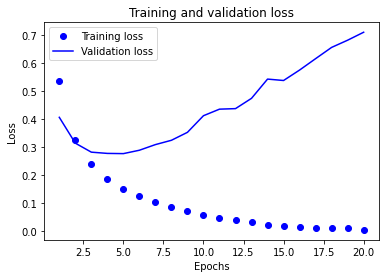

In [ ]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")    #"bo" is for "blue dot."
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #"b" is for "solid blue line."
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

We can see that the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient descent optimization — the quantity you’re trying to minimize should be less with
every iteration.

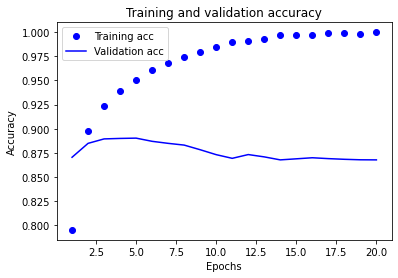

In [ ]:
# Plotting the training and validation accuracy

#hplt.clf()      #clears the previous figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

For the validation loss and accuracy, we can see that this is not the case. A model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting. Obviously,  we’re overoptimizing on the training data, which will now end up learning representations that are specific to that training data, and won’t generalize to data outside of the training set.

To prevent overfitting, you could stop training after a number of epochs, or apply other range of techniques.

Let's now train a new network from scratch for about four epochs, then evaluate it on our test data:

In [ ]:
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4708 - accuracy: 0.8239
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2725 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2071 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3378 - accuracy: 0.8642


In [ ]:
results

[0.33777695894241333, 0.8641600012779236]

The first number, 0.33, is the test loss, and the second number,
0.87, is the test accuracy.

Our fairly naive approach achieves an accuracy of ~88%. With state-of-the-art approaches, we should be able to get close to 95%.



**Using a trained model to generate predictions on new data**

After having trained a network, you'll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the `predict` method:


In [ ]:
model.predict(x_test[1:10])
#model.predict(x_test)

1/1 [==============================] - 0s 60ms/step


array([[0.9998807 ],
       [0.38492247],
       [0.49995285],
       [0.9144147 ],
       [0.7005799 ],
       [0.9954755 ],
       [0.014301  ],
       [0.9479896 ],
       [0.9331245 ]], dtype=float32)

We can see that the model is very confident for some samples (0.99 or more, and less confident for others (0.6, 0.4).

**Further Experimentations:**

The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

1. You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy.
2. Try using layers with more units or fewer units: 32 units, 64 units, and so on.
3. Try using the mse loss function instead of binary_crossentropy.
4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu. 

**Wrapping up**

Here’s what you should take away from this example:

1. You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it as tensors into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.
2. Stacks of Dense layers with relu activations can solve a wide range of problems (including `sentiment classification`), and you’ll likely use them frequently.
3. In a binary classification problem (two output classes), your model should end with a Dense layer with one unit and a sigmoid activation: the output of your model should be a scalar between 0 and 1, encoding a probability.
4. With such a scalar sigmoid output on a binary classification problem, the loss function you should use is `binary_crossentropy'.
5. The `rmsprop` optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
6. As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

## 2. Classifying newswires: a multi-class classification example

In the previous section we saw how to classify vector inputs into two mutually exclusive classes using a densely-connected neural network. But what happens when you have more than two classes? 

In this section, we will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many classes, this problem is an instance of "multi-class classification", 
and since each data point should be classified into only one category, the problem is more specifically an instance of "single-label, multi-class classification". 
If each data point could have belonged to multiple categories (in our case, topics) then we would be facing a "multi-label, multi-class classification" problem.


**The Reuters dataset**

You’ll work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set. As usual, let's load the dataset.

In [ ]:
# Loading the Reuters dataset
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


As with the IMDB dataset, the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data. You have 8,982 training examples and 2,246 test examples:

In [ ]:
# Examine the data
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [ ]:
train_data[10]

As with the IMDB reviews, each example is a list of integers (word indices). Let's go through the process of decoding the integers back to words again:

In [ ]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 1s 1us/step


Note again that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.” 

The label associated with an example is an integer between 0 and 45—a topic index:

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[10]

3

## Preparing the data

We can vectorize the data with the exact same code as in our previous example:

In [ ]:
# Encoding the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

To vectorize the labels, there are two possibilities: you can cast the label list as an integer tensor, or you can use one-hot encoding. One-hot encoding is a widely used format
for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of
the label index. The following listing shows an example.

In [ ]:
# Encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
y_train = to_one_hot(train_labels)
# Our vectorized test labels
y_test = to_one_hot(test_labels)


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Note that there is a built-in way to do this in Keras, which you have already seen in action in our MNIST example:

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building our network


This topic classification problem looks very similar to our previous movie review classification problem: in both cases, we are trying to 
classify short snippets of text. There is however a new constraint here: the number of output classes has gone from 2 to 46, i.e. the 
dimensionality of the output space is much larger. 

In a stack of `Dense` layers like what we were using, each layer can only access information present in the output of the previous layer. 
If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each 
layer can potentially become an "information bottleneck". In our previous example, we were using 16-dimensional intermediate layers, but a 
16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, 
permanently dropping relevant information.

For this reason we will use larger layers. Let's go with 64 units:

In [ ]:
# Model definition
model = keras.Sequential([
layers.Dense(64, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(46, activation="softmax")
])

There are two things to note about this architecture:

First, we end the model with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.


Second, the last layer uses a softmax activation. You saw this pattern in the MNIST example. It means the model will output a probability distribution over the 46 different output classes, i.e., for every input sample, the model will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is `categorical_crossentropy`. It measures the distance between two probability distributions: 
in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach

Let's set apart 1,000 samples in our training data to use as a validation set:

In [ ]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

We will now train the model for 20 epochs.

In [ ]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 29ms/step - loss: 2.6216 - accuracy: 0.5272 - val_loss: 1.7480 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4213 - accuracy: 0.6967 - val_loss: 1.3265 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0519 - accuracy: 0.7699 - val_loss: 1.1394 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8273 - accuracy: 0.8200 - val_loss: 1.0493 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6594 - accuracy: 0.8626 - val_loss: 0.9851 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5285 - accuracy: 0.8923 - val_loss: 0.9349 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4306 - accuracy: 0.9107 - val_loss: 0.9586 - val_accuracy: 0.8010
Epoch 8/20
16

Finally, let’s display its loss and accuracy curves.

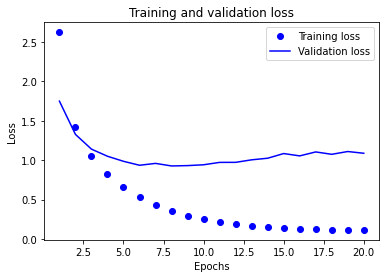

In [ ]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

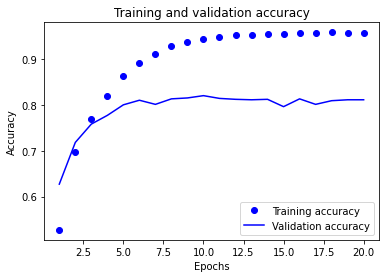

In [ ]:
# Plotting the training and validation accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after about nine epochs. Let’s train a new model from scratch for nine epochs and then evaluate it on the test set.

In [ ]:
# Retraining model from scratch
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5605 - accuracy: 0.5353
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.3599 - accuracy: 0.7138
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9961 - accuracy: 0.7852
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7753 - accuracy: 0.8398
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6140 - accuracy: 0.8765
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4920 - accuracy: 0.9008
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4035 - accuracy: 0.9164
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3289 - accuracy: 0.9303
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9734 - accuracy: 0.7907


In [ ]:
results

[0.9734231233596802, 0.790739119052887]

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case, we have 46 classes, and they may not be equally represented. What would be the accuracy of a random baseline? We could try quickly implementing one to check
this empirically:

In [ ]:
import copy  #don't understand what this part is supposed to be doing
test_labels_copy = copy.copy(test_labels)
print(test_labels)
print(test_labels_copy)
np.random.shuffle(test_labels_copy)
print(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(hits_array)
print(hits_array.mean())

[ 3 10  1 ...  3  3 24]
[ 3 10  1 ...  3  3 24]
[ 3 20 19 ... 19  1  4]
[ True False False ... False False False]
0.18699910952804988


We can see that a random classifier would score around 19% classification accuracy, so the results of our model seem pretty good in that light.

## Generating predictions on new data

Calling the model’s predict method on new samples returns a class probability distribution over all 46 topics for each sample. Let’s generate topic predictions for all of the test data:

In [ ]:
predictions = model.predict(x_test)
predictions[0]

71/71 [==============================] - 0s 2ms/step


array([6.99660392e-04, 5.57889696e-04, 1.70714557e-05, 2.10592538e-01,
       7.30549574e-01, 1.55619011e-04, 5.10835707e-05, 2.96755636e-04,
       4.52640979e-03, 4.04972525e-04, 4.89659433e-04, 1.19525427e-02,
       2.79104919e-04, 1.49299391e-04, 1.25138640e-05, 4.50528532e-05,
       4.35619522e-03, 3.11184442e-04, 2.62000365e-04, 1.78419612e-02,
       9.73718241e-03, 4.01782338e-04, 2.46195908e-04, 1.62141270e-03,
       7.47041413e-05, 3.05376976e-04, 2.50379817e-05, 1.04832165e-04,
       6.65626314e-04, 3.20751889e-04, 7.28882806e-05, 8.43558868e-04,
       1.82045696e-04, 4.88334335e-05, 3.26603418e-04, 1.86361751e-04,
       3.46956222e-04, 3.08874260e-05, 2.21793031e-04, 4.65091260e-04,
       3.48358699e-05, 8.02227732e-05, 9.75338480e-06, 6.24758322e-05,
       1.08106015e-05, 2.28103490e-05], dtype=float32)

Each entry in “predictions” is a vector of length 46:

In [ ]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1, as they form a probability distribution:

In [ ]:
np.sum(predictions[0])

0.9999999

The largest entry is the predicted class—the class with the highest probability:

In [ ]:
np.argmax(predictions[0])

4

## A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensors as shown:

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the `loss function`. The `loss function` used previously is  `categorical_crossentropy`, which expects the labels to follow
a categorical encoding. With integer labels, you should use `sparse_categorical_crossentropy`:

In [ ]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=["accuracy"]
)

This new loss function is still mathematically the same as `categorical_crossentropy`; it just has a different interface.


## importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should avoid intermediate layers with outputs fewer than 46 units. Now let’s see what happens when we introduce an information bottleneck by having intermediate layers that are
significantly less than 46-dimensional: for example, 4-dimensional.

In [ ]:
# A model with an information bottleneck
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 2.9657 - accuracy: 0.1770 - val_loss: 2.1706 - val_accuracy: 0.5150
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7189 - accuracy: 0.6064 - val_loss: 1.5459 - val_accuracy: 0.6270
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2969 - accuracy: 0.6912 - val_loss: 1.3601 - val_accuracy: 0.6780
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0917 - accuracy: 0.7405 - val_loss: 1.2986 - val_accuracy: 0.6980
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9617 - accuracy: 0.7641 - val_loss: 1.2587 - val_accuracy: 0.7240
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8669 - accuracy: 0.7815 - val_loss: 1.2653 - val_accuracy: 0.7230
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7899 - accuracy: 0.7965 - val_loss: 1.2692 - val_accuracy: 0.7340
Epoch 8/20
63/63 [==

The model now peaks at ~70% validation accuracy, about 9% absolute drop. This drop is mostly due to the fact that we’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The model is able to cram most of the necessary information into these four-dimensional representations, but not all of it.


**Further experimentations**

Like in the previous example, try out the following experiments to
train your intuition about the kind of configuration decisions you have to make with such models:
1. Try using larger or smaller layers: 32 units, 128 units, and so on.
2. You used two intermediate layers before the final softmax classification layer. Now try using a single intermediate layer, or three intermediate layers.

## Wrapping up

Here’s what you should take away from this example:

1. If you’re trying to classify data points among `N classes`, your model should end with a `Dense layer` of `size N`.
2. In a single-label, multiclass classification problem, your model should end with a `softmax activation` so that it will output a probability distribution over the `N` output classes.
3. `Categorical crossentropy` is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the model and the true distribution of the targets.
3. There are two ways to handle labels in multiclass classification:

– Encoding the labels via categorical encoding (also known as `one-hot encoding`) and using `categorical_crossentropy` as a loss function.
  
– Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.
4. If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your model due to intermediate layers that are too small.


# 3. Predicting house prices: a regression example

In our two previous examples, we were considering classification problems, where the goal was to predict a single discrete label of an input data point. 

Another common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.

**NOTE:** Do not mix up "regression" with the algorithm "logistic regression": confusingly, "logistic regression" is not a regression algorithm, it is a classification algorithm.


## The Boston Housing Price dataset
We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset we will be using has another interesting difference from our two previous examples: 

it has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...

Let's take a look at the data:


In [ ]:
# Loading the Boston housing dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape


As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as 
follow:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [ ]:
train_targets

The prices are typically between 10,000 and 50,000 USD. If that sounds cheap, remember this was the mid-1970s, and these prices are not 
inflation-adjusted.

## Preparing the data


It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to 
automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal 
with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we 
will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a 
unit standard deviation. This is easily done in Numpy:

In [ ]:
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the training data. You should never use any quantity computed on the test data in your workflow, even for something as simple as data normalization.

## Building our network

Because so few samples are available, we’ll use a very small model with two intermediate layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small model is one way to mitigate overfitting.

Because we will need to instantiate the same model multiple times, we use a function to construct it.

In [ ]:
# Model definition

def build_model():
  model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

Our network ends with a single unit, and no activation (i.e. it will be linear layer). 
This is a typical setup for scalar regression (i.e. regression where we are trying to predict a single continuous value). 

Applying an activation function would constrain the range that the output can take; for instance if we applied a `sigmoid` activation function to our last layer, the network could only learn to predict values between 0 and 1. 

Here, because the last layer is purely linear, the network is free to learn to predict values in any range.

Note that we compile the model with the `mse` loss function — mean squared error, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.

We’re also monitoring a new metric during training: `mean absolute error (MAE)`. It’s the absolute value of the difference between the predictions and the targets. For instance, an `MAE` of 0.5 on this problem would mean your predictions are off by $500 on average.

## Validating our approach using K-fold validation


To evaluate our model while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the data into a training set and a validation set, as we did previously. However, because we have so few data points, the 
validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot depending on which data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a high _variance_ with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions (typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the K validation scores obtained.

In terms of code, this is straightforward:

In [ ]:
# K-fold validation
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i}")

  # Prepares the validation data: data from partition #k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  # Prepare the training data: data from all other partitions  
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis=0)
  
  # Build the Keras model (already compiled)
  model = build_model()

  # Train the model (in silent mode, verbose=0)
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0)
  
  # Evaluate the model on the validation data
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Running this with num_epochs = 100 yields the following results:

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)


As you can notice, the different runs do indeed show rather different validation scores, from 2.1 to 2.9. Their average (2.4) is a much more reliable metric than any single of these scores -- that's the entire point of K-fold cross-validation. In this case, we are off by 2,400 on average, which is still significant considering that the prices range from 10,000 to 50,000. 

Let's try training the network for a bit longer: 500 epochs. To keep a record of how well the model did at each epoch, we will modify our training loop to save the per-epoch validation score log as shown:

In [ ]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [ ]:
# Saving the validation logs at each fold

num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")

  # Prepare the validation data: data from partition # k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  # Prepare the training data: data from all other partitions
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis=0)
  
   # Build the Keras model (already compiled)
   model = build_model()

   # Train the model (in silent mode, verbose=0)
   history = model.fit(partial_train_data, partial_train_targets,
                       validation_data=(val_data, val_targets),
                       epochs=num_epochs, batch_size=16, verbose=0)
   mae_history = history.history["val_mae"]
   all_mae_histories.append(mae_history)

We can then compute the average of the per-epoch MAE scores for all folds:

In [ ]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Let’s plot the vallidation scores:

In [ ]:
# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to read the plot, due to a scaling issue: the validation `MAE` for the first few epochs is dramatically higher than the values that follow. Let’s omit
the first 10 data points, which are on a different scale than the rest of the curve.

In [ ]:
# Plotting validation scores, excluding the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

We can observe that validation MAE stops improving significantly after 120–140 epochs (this number includes the 10 epochs we omitted). Anything beyond that point will overfit. 

Once you’re finished tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the intermediate layers) and train a final production model on all of the training data, with the best parameters,
and then look at its performance on the test data.

In [ ]:
# Training the final model

# Get a fresh, compiled model.
model = build_model()

# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=40, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

The final result is shown below:

In [ ]:
test_mae_score

Even though we’re still off by a bit under $2,500. It’s still an improvement! Just like with the two previous tasks, you can try varying the number of layers in the model, or the number of
units per layer, to see if you can squeeze out a lower test error.

## Generating predictions on new data

When calling `predict()` on our binary classification model, we retrieved a scalar score between 0 and 1 for each input sample. With our multiclass classification model, we retrieved a probability distribution over all classes for each sample. Now, with this scalar regression model, `predict()` returns the model’s guess for the sample’s price in thousands of dollars:

In [ ]:
# Predict new data
predictions = model.predict(test_data)
predictions[0]

The first house in the test set is predicted to have a price of about $10,000.

## Wrapping up


Here's what you should take away from this scalar regression example:

* Regression is done using different loss functions than we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
* When little training data is available, it’s preferable to use a small model with few intermediate layers (typically only one or two), in order to avoid severe overfitting.

This example concludes our series of three introductory practical examples. You are now able to handle common types of problems with vector data input:

* Binary (2-class) classification.
* Multi-class, single-label classification.
* Scalar regression.
